In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [7]:
## Data Exploration

df = pd.read_csv(r'C:\Users\wowbe\Python Codes Entri\Assignments\Employee.csv')
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [9]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
# Unique values and length of 'Company'
df['Company'].unique(), len(df['Company'])

(array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
 148)

In [13]:
# Unique values and length of 'Place'
df['Place'].unique(), len(df['Place'])

(array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 148)

In [19]:
# Unique values and length of 'Age'
df['Age'].unique(), len(df['Age'])

(array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
        21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
        33., 17.,  0., 54.]),
 148)

In [21]:
# Unique values and length of 'Salary'
df['Salary'].unique(), len(df['Salary'])

(array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
        1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
        8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
        9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
        3454., 5654., 5009., 5098., 3033.]),
 148)

In [23]:
# Unique values and length of 'Gender'
df['Gender'].unique(), len(df['Gender'])

(array([0, 1], dtype=int64), 148)

In [25]:
# Unique values and length of 'Country'
df['Country'].unique(), len(df['Country'])

(array(['India'], dtype=object), 148)

In [29]:
## Data Cleaning

# Checking null
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [31]:
# Checking duplicate
df.duplicated().sum()

4

In [35]:
# Removing duplicates
df= df.drop_duplicates()

In [39]:
#checking for duplicates
df.duplicated().sum()

0

In [43]:
# Replace numerical columns' missing values with median or mean

for column in df.select_dtypes(include=[np.number]).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

In [65]:
# Replace categorical columns' missing values with mode
for column in df.select_dtypes(include=[object]).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [70]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

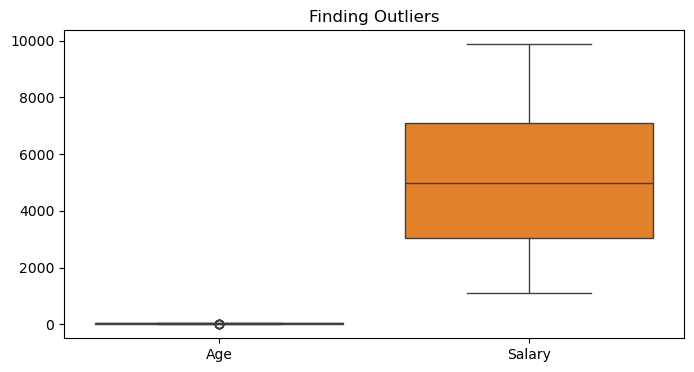

In [57]:
#Checking for outliers
numerical_columns = ['Age','Salary']
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_columns])
plt.title('Finding Outliers')
plt.show()
            

In [ ]:
## Data Analysis

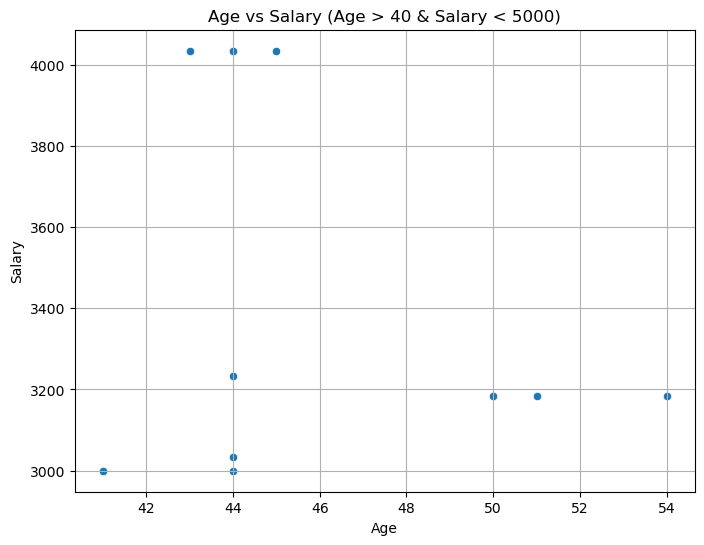

In [96]:
## Scatter Plot of Age vs Salary for Filtered Data

filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_df
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Salary')
plt.title('Age vs Salary (Age > 40 & Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [98]:
filtered_df

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


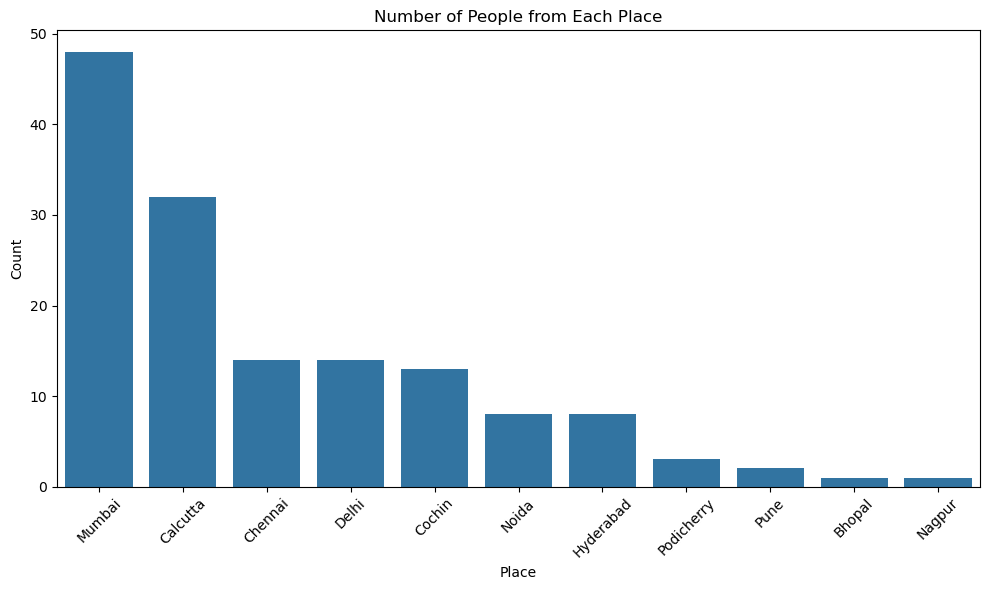

In [100]:
# Counting the number of people from each place
place_counts = df['Place'].value_counts()
print(place_counts)

# Plotting it as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [153]:
## Data Encoding

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = label_encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)



In [155]:
df.head()

,Age,Salary,Country,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.037595,-0.100827,India,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,-0.078585,-0.100827,India,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.400919,-1.243735,India,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,0.880424,-0.947426,India,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,-0.749892,-0.524127,India,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [157]:
## Scaling
numerical_columns = ['Age', 'Salary']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [159]:
df.head()

,Age,Salary,Country,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.037595,-0.100827,India,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,-0.078585,-0.100827,India,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.400919,-1.243735,India,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,0.880424,-0.947426,India,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,-0.749892,-0.524127,India,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
